In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("embeddings_human_out.csv")

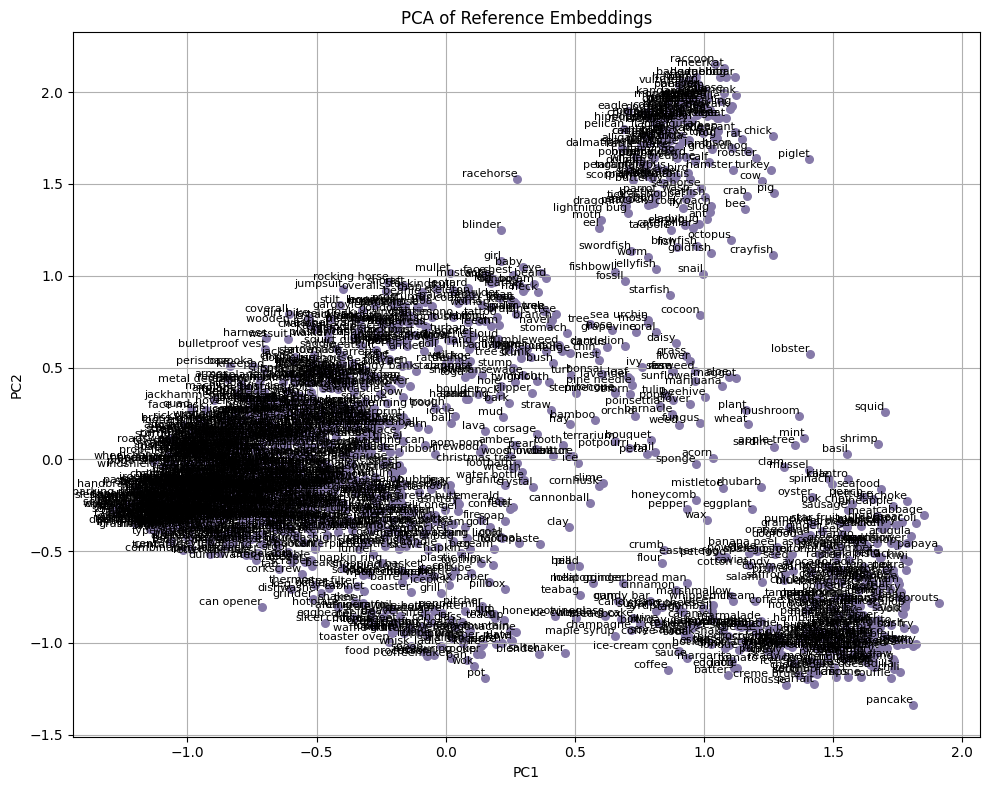

In [6]:
embeddings = df["embedding"].apply(lambda x: np.fromstring(x, sep=" ")).tolist()
X = np.vstack(embeddings)  # shape (n_items, dim)

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="#867aa9", s=30)
for i, label in enumerate(df["item"]):
    plt.text(X_pca[i, 0], X_pca[i, 1], label, fontsize=8, ha='right', va='bottom')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Reference Embeddings")
plt.grid(True)
plt.tight_layout()
plt.show()

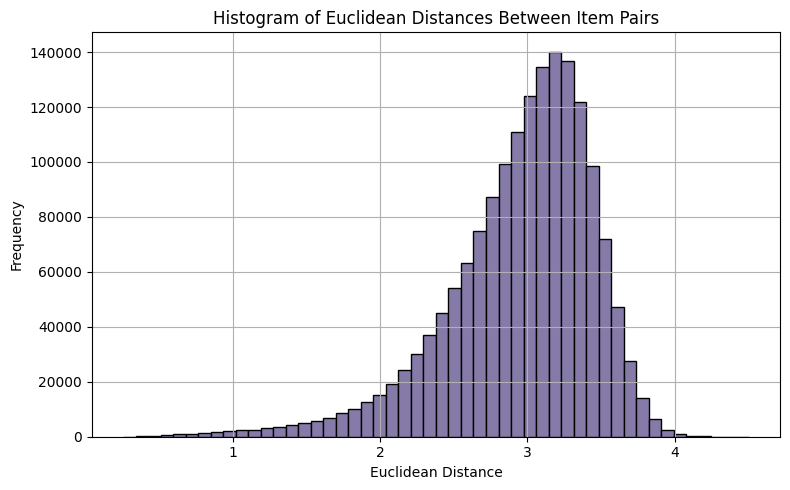

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.spatial.distance import euclidean


X = np.vstack(embeddings)
labels = df["item"].tolist()

# Compute all pairwise distances (upper triangle only)
pairwise_dists = []
for i, j in combinations(range(len(X)), 2):
    dist = euclidean(X[i], X[j])
    pairwise_dists.append(dist)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(pairwise_dists, bins=50, color="#867aa9", edgecolor="black")
plt.title("Histogram of Euclidean Distances Between Item Pairs")
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
